# Ejercicios de Procesamiento Digital de Imágenes

Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado. 
b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio. 
c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

Ejercicio 2: Muestreo y Cuantización

a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8. 
b) Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos 
c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256) 
d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

Ejercicio 3: Segmentación por Color

Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB. 
b) Calcular y mostrar el histograma de la imagen en escala de grises. 
c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado. 
d) Dibujar los bordes del objeto segmentado en color rojo.

Criterios de Evaluación:

Correcta implementación del código (40%)
Comprensión de los conceptos teóricos demostrada en las explicaciones (30%)
Análisis de resultados y conclusiones (20%)
Claridad en la presentación de resultados (10%)

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

## 1. Introducción a los Espacios de Color

Las imágenes digitales a color se pueden representar de diferentes maneras. Los dos espacios
de color más comunes en procesamiento digital de imágenes son:

- **RGB (Red, Green, Blue)**:
  - Usado por la mayoría de dispositivos de visualización
  - Cada pixel se representa con 3 valores (Rojo, Verde, Azul)
  - Valores típicos entre 0-255 por canal

- **BGR (Blue, Green, Red)**:
  - Formato utilizado por OpenCV
  - Misma estructura que RGB pero con orden invertido
  - Importante para evitar errores de interpretación

In [3]:
!wget https://i.pinimg.com/736x/0d/c3/f9/0dc3f93a6f91732c26438dcc113df3c5.jpg

--2025-04-13 04:09:20--  https://i.pinimg.com/736x/0d/c3/f9/0dc3f93a6f91732c26438dcc113df3c5.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.128.84, 151.101.192.84, 151.101.0.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.128.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136622 (133K) [image/jpeg]
Saving to: ‘0dc3f93a6f91732c26438dcc113df3c5.jpg.10’

0dc3f93a6f91732c264 100%[===================>] 133.42K  --.-KB/s    in 0.006s  

2025-04-13 04:09:20 (21.0 MB/s) - ‘0dc3f93a6f91732c26438dcc113df3c5.jpg.10’ saved [136622/136622]



## 2. Trabajando con OpenCV (cv2)

OpenCV es una biblioteca especializada en visión por computador y procesamiento de imágenes.
Características importantes:
- Utiliza formato BGR por defecto
- Eficiente en términos de procesamiento
- Ampliamente utilizada en aplicaciones de visión computacional

Dimensiones de la imagen: (1313, 736, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 2899104


(-0.5, 735.5, 1312.5, -0.5)

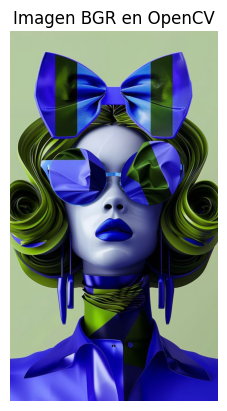

In [4]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread('gafas10.jpg')

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
#cv2_imshow(imagen_bgr)
plt.imshow(imagen_bgr)
plt.title('Imagen BGR en OpenCV')
plt.axis('off')  # Muestra los ejes para referencia
#plt.colorbar()  # Añade barra de color
#plt.show()

### 2.1 Análisis de Canales BGR

Cada canal representa la intensidad de un color específico:
- Valores cercanos a 0 indican ausencia del color
- Valores cercanos a 255 indican máxima intensidad

Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 255, Promedio: 86.43


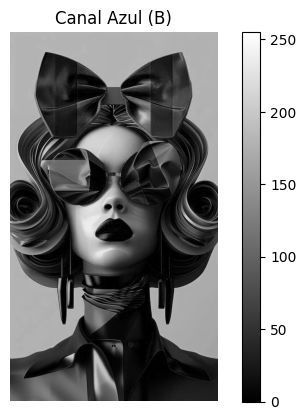

In [5]:
# Canal Azul (B)
B = imagen_bgr[:,:,0]
print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {B.min()}, Valor máximo: {B.max()}, Promedio: {B.mean():.2f}")

# Using plt.imshow() instead of cv2_imshow since we're working with matplotlib
plt.figure()
plt.imshow(B, cmap='gray')  # Use grayscale colormap for single channel
plt.title('Canal Azul (B)')
plt.colorbar()  # Add colorbar to show intensity values
plt.axis('off')
plt.show()


Estadísticas del canal Verde:
Valor mínimo: 0, Valor máximo: 255, Promedio: 96.98


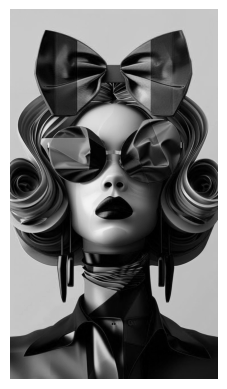

In [6]:
# Canal Verde (G)
G = imagen_bgr[:,:,1]
print("\nEstadísticas del canal Verde:")
print(f"Valor mínimo: {G.min()}, Valor máximo: {G.max()}, Promedio: {G.mean():.2f}")
#cv2_imshow(G) utilizo plt.imshow() para mostrar la imagen porque estoy trabajando con Deepnote

# Using plt.imshow() instead of cv2_imshow since we're working with matplotlib
plt.figure()
plt.axis('off')
plt.imshow(G, cmap='gray')  # Use grayscale colormap for single channel


Estadísticas del canal Rojo:
Valor mínimo: 0, Valor máximo: 255, Promedio: 119.51


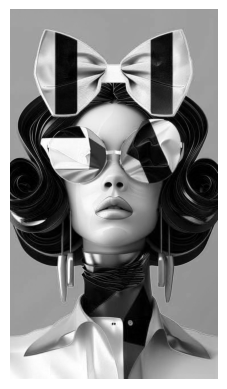

In [7]:
# Canal Rojo (R)
R = imagen_bgr[:,:,2]
print("\nEstadísticas del canal Rojo:")
print(f"Valor mínimo: {R.min()}, Valor máximo: {R.max()}, Promedio: {R.mean():.2f}")
#cv2_imshow(R) no funciona porque estoy usando Deepnote
# Using plt.imshow() instead of cv2_imshow since we're working with matplotlib
plt.figure()
plt.axis('off')
plt.imshow(R, cmap='gray')  # Use grayscale colormap for single channel

## 3. Trabajando con Matplotlib

Matplotlib ofrece funcionalidades más avanzadas de visualización:
- Usa formato RGB por defecto
- Permite personalización detallada de gráficos
- Ideal para presentación y análisis visual

In [8]:
import matplotlib.pyplot as plt

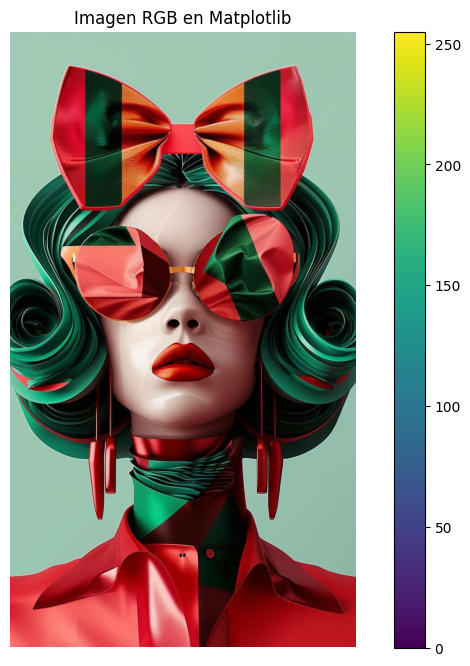

In [9]:
# Lectura y visualización con Matplotlib
imagen_rgb = plt.imread('gafas10.jpg')
plt.figure(figsize=(10,8))
plt.imshow(imagen_rgb)
plt.title('Imagen RGB en Matplotlib')
plt.axis('off')  # On Matplotlib, Muestra los ejes para referencia Off no muestra los ejes
plt.colorbar()  # Añade barra de color
plt.show()

### 3.1 Visualización Detallada de Canales RGB

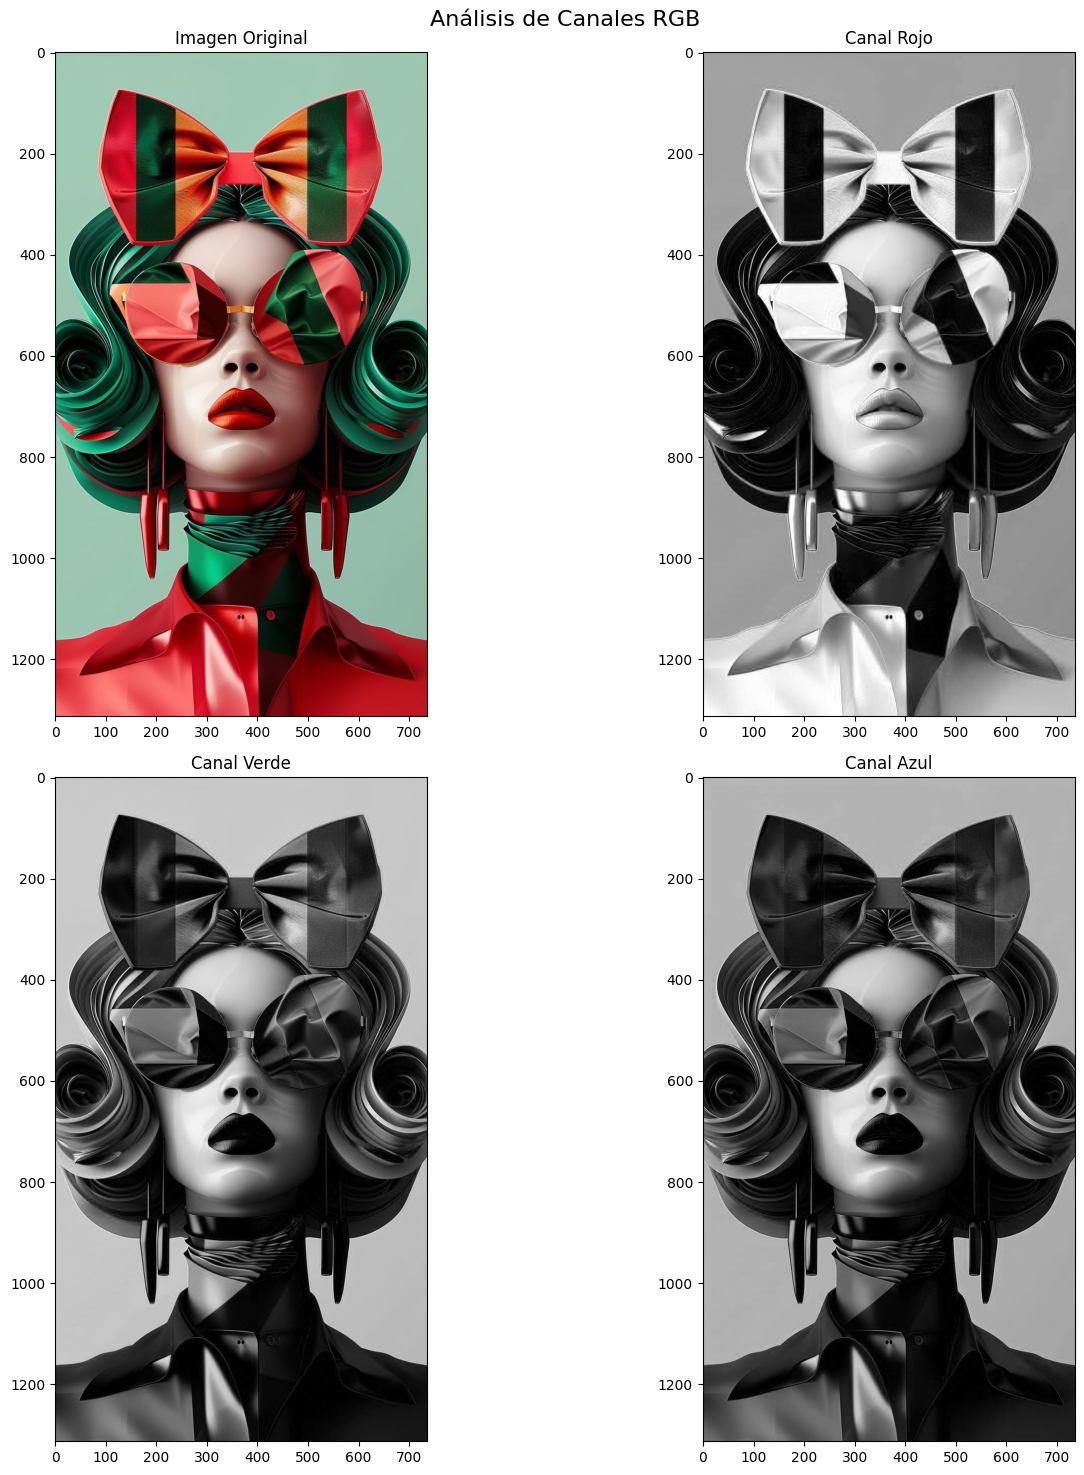

In [10]:
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Análisis de Canales RGB', fontsize=16)

# Imagen Original
axes[0,0].imshow(imagen_rgb)
axes[0,0].set_title('Imagen Original')

# Canal Rojo
axes[0,1].imshow(imagen_rgb[:,:,0], cmap='gray')
axes[0,1].set_title('Canal Rojo')

# Canal Verde
axes[1,0].imshow(imagen_rgb[:,:,1], cmap='gray')
axes[1,0].set_title('Canal Verde')

# Canal Azul
axes[1,1].imshow(imagen_rgb[:,:,2], cmap='gray')
axes[1,1].set_title('Canal Azul')

plt.tight_layout()
plt.show()


## 4. Conversión entre Espacios de Color

Es crucial entender cómo convertir entre BGR y RGB:
- Evita errores de interpretación
- Permite usar correctamente ambas bibliotecas

In [11]:
# Demostración de conversión BGR a RGB
imagen_bgr = cv2.imread('gafas10.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

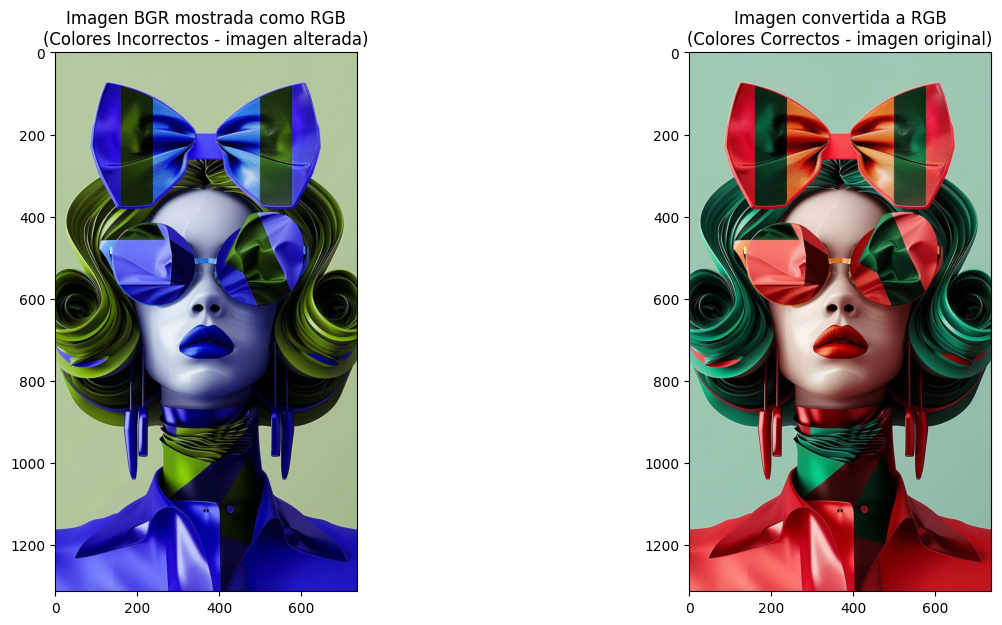

In [12]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.imshow(imagen_bgr)
ax1.set_title('Imagen BGR mostrada como RGB\n(Colores Incorrectos - imagen alterada)')

ax2.imshow(imagen_rgb)
ax2.set_title('Imagen convertida a RGB\n(Colores Correctos - imagen original)')

plt.show()

## 5. Resumen y Conceptos Clave

### Puntos Importantes:
1. **Espacios de Color**:
   - RGB: Estándar en visualización
   - BGR: Estándar en OpenCV
   
2. **Bibliotecas**:
   - OpenCV: Orientado a procesamiento
   - Matplotlib: Orientado a visualización

3. **Buenas Prácticas**:
   - Verificar siempre el espacio de color
   - Usar las funciones de conversión adecuadas
   - Documentar el formato usado en cada paso

### Ejercicios Sugeridos:
1. Cargar una imagen propia y analizar sus canales
2. Experimentar con diferentes mapas de color en Matplotlib
3. Practicar conversiones entre BGR y RGB

## Prueba visual compacta de todas las imágenes

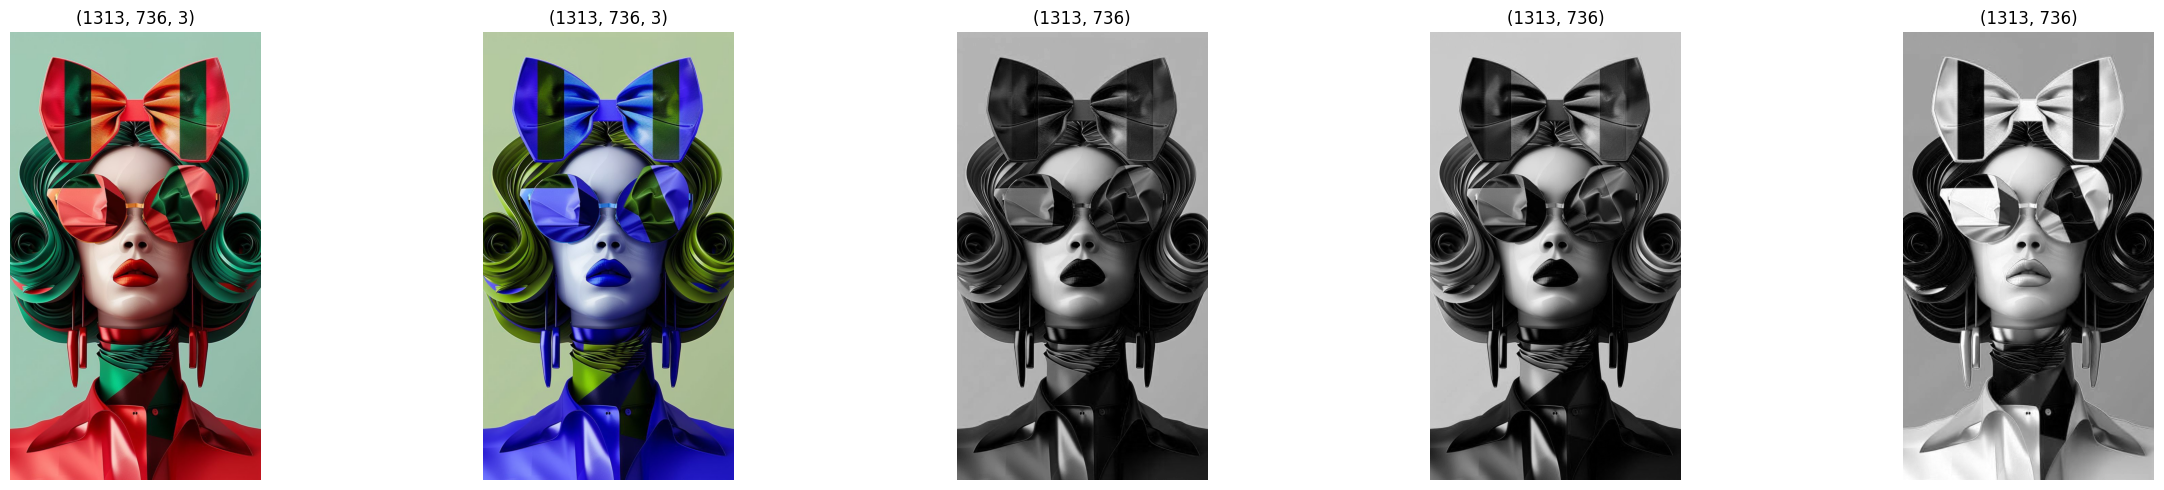

In [13]:
plt.figure(figsize=(25, 5))  # Aumentamos el ancho por tener 5 imágenes

plt.subplot(1, 5, 1)
plt.imshow(imagen_rgb, cmap='gray')
plt.title(f'{imagen_rgb.shape}')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(imagen_bgr, cmap='gray')
plt.title(f'{imagen_bgr.shape}')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(B, cmap='gray')
plt.title(f'{B.shape}')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(G, cmap='gray')
plt.title(f'{G.shape}')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(R, cmap='gray')
plt.title(f'{R.shape}')
plt.axis("off")

plt.tight_layout()
plt.show()

# Muestreo y Cuantización en Procesamiento de Imágenes

El procesamiento digital de imágenes se basa en dos operaciones fundamentales:

* Muestreo espacial: Convertir una imagen continua en una matriz discreta de píxeles

* Cuantización: Asignar valores discretos a la intensidad de cada píxel

Estas bibliotecas son fundamentales:

* NumPy: Permite trabajar con matrices (que es como se representan las imágenes)
* OpenCV (cv2): Biblioteca especializada en procesamiento de imágenes
* Matplotlib: Nos permite visualizar las imágenes y gráficos

## Visualización y análisis de la imagen original

In [14]:
# Muestra información básica de la imagen
def howis(img):
    print('Tamaño =', img.shape)     # Dimensiones de la matriz
    print('Máximo =', np.max(img))   # Valor más alto (más blanco)
    print('Mínimo =', np.min(img))   # Valor más bajo (más negro)

In [15]:
# 3. CARGA Y VISUALIZACIÓN DE IMAGEN ORIGINAL
X = imread('gafas10.jpg')    # Lee la imagen del archivo
X = X[:,:,0]               # Toma solo el primer canal (rojo)
                          # Los : significan "todos los elementos"

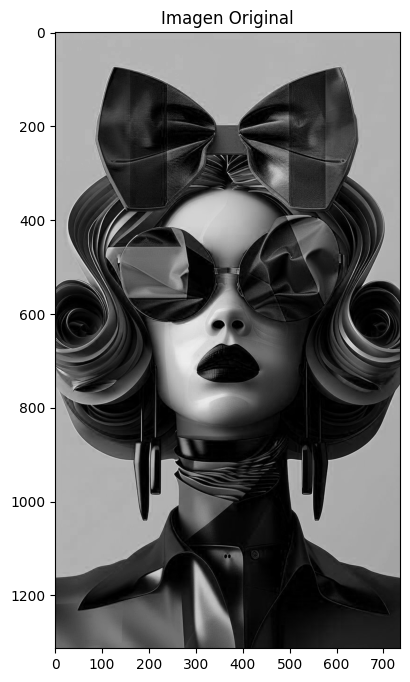

Tamaño = (1313, 736)
Máximo = 255
Mínimo = 0


In [16]:
# Muestra la imagen original
plt.figure(figsize=(8,8))   # Crea figura de 8x8 pulgadas
plt.imshow(X, cmap='gray')  # Muestra imagen en escala de grises
plt.title('Imagen Original')
plt.show()                  # Muestra la figura
howis(X)                    # Muestra información

## Muestreo Espacial

El muestreo espacial reduce la resolución de una imagen tomando píxeles a intervalos regulares.

In [17]:
d = 2   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,d)         # Crea secuencia de 0 a Nx saltando de d en d
jx = range(0,Mx,d)         # Igual para columnas
Ny = len(ix)               # Nueva altura = número de filas a tomar
My = len(jx)               # Nueva anchura = número de columnas a tomar

In [18]:
# Crea nueva imagen muestreada
Y = np.zeros((Ny,My), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Ny):              # Para cada fila
    for j in range(My):          # Para cada columna
        Y[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

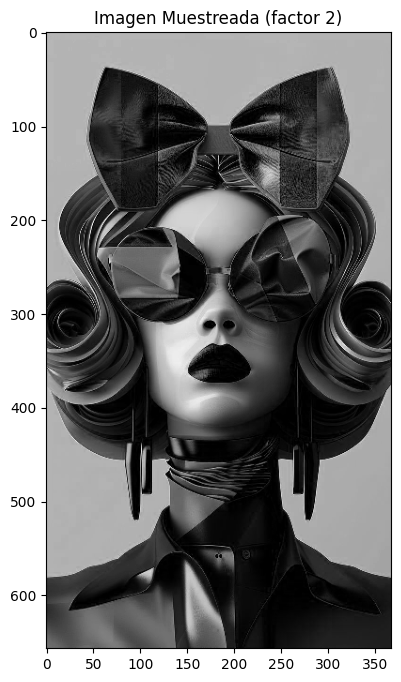

Tamaño = (657, 368)
Máximo = 255
Mínimo = 0
Resolución reducida de 1313x736 a 657x368 pixels


In [19]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(Y, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
howis(Y)
print(f'Resolución reducida de {Nx}x{Mx} a {Ny}x{My} pixels')

## Cuantizacion

La cuantización reduce el número de niveles de gris en la imagen.

In [20]:
q = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Z = np.floor(X/q)*q      # Agrupa valores en intervalos de tamaño q
Z = Z.astype(np.uint8)   # Convierte a enteros 0-255

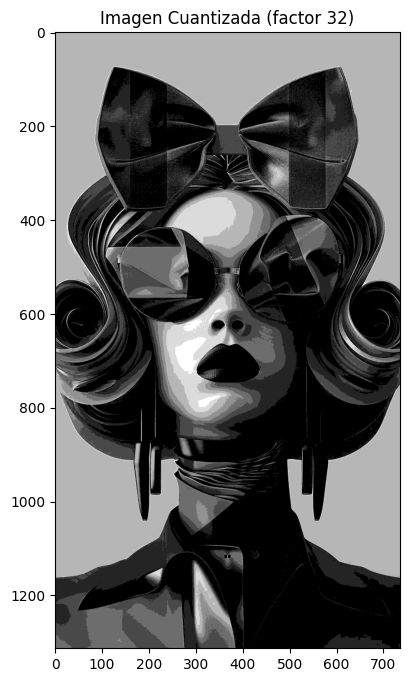

Tamaño = (1313, 736)
Máximo = 224
Mínimo = 0
Esta imagen tiene 8 niveles de gris (original: 256)


In [21]:
# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
howis(Z)
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

## Histograma de la imagen

El histograma muestra la distribución de los niveles de gris en la imagen.

In [22]:
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

VISUALIZACIÓN DE HISTOGRAMAS

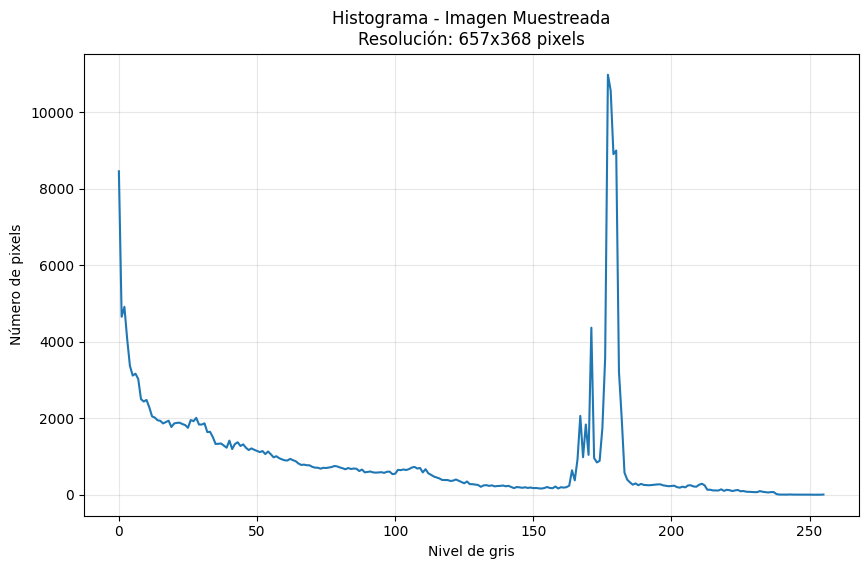

In [23]:
# Histograma imagen muestreada
plt.figure(figsize=(10,6))
plt.plot(hist(Y))
plt.title(f'Histograma - Imagen Muestreada\nResolución: {Ny}x{My} pixels')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

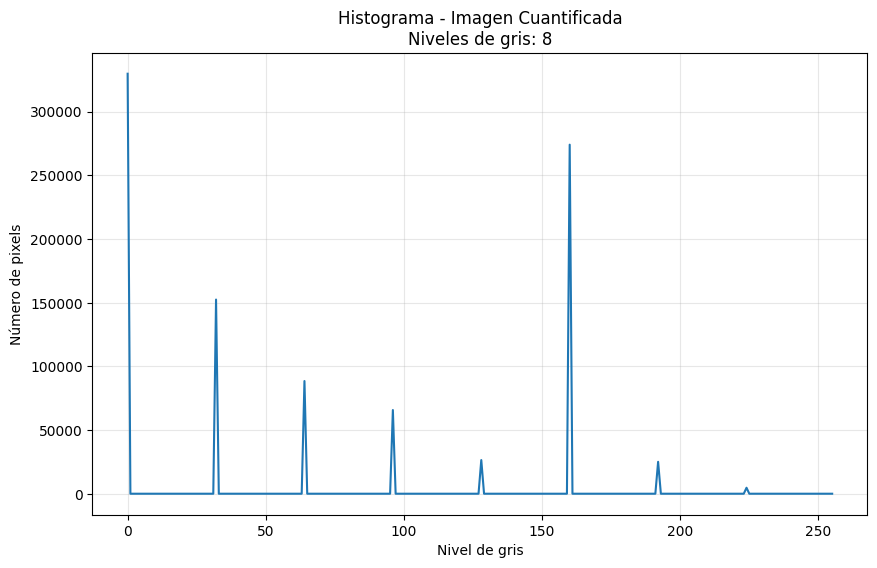

In [24]:
# Histograma imagen cuantizada
plt.figure(figsize=(10,6))
plt.plot(hist(Z))
plt.title(f'Histograma - Imagen Cuantificada\nNiveles de gris: {int(256/q)}')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de pixels')
plt.grid(True, alpha=0.3)
plt.show()

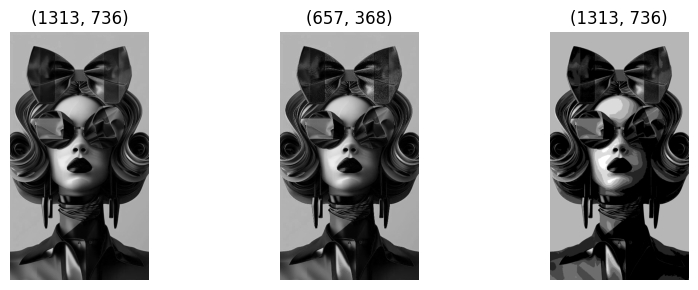

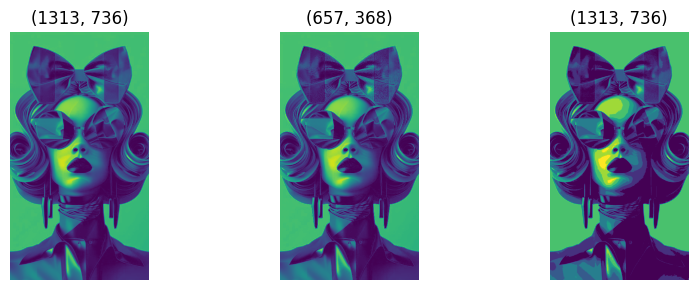

In [25]:
plt.figure(figsize=(9, 3))  # Aumentamos el ancho por tener 3 imágenes

plt.subplot(1, 3, 1)
plt.imshow(X, cmap='gray')
plt.title(f'{X.shape}')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Y, cmap='gray')
plt.title(f'{Y.shape}')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(Z, cmap='gray')
plt.title(f'{Z.shape}')
plt.axis("off")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 3))  # Aumentamos el ancho por tener 3 imágenes

plt.subplot(1, 3, 1)
plt.imshow(X)
plt.title(f'{X.shape}')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Y)
plt.title(f'{Y.shape}')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(Z)
plt.title(f'{Z.shape}')
plt.axis("off")

plt.tight_layout()
plt.show()



### Conceptos clave para reforzar

* Resolución espacial: Número de píxeles en la imagen (afectado por el muestreo)
* Profundidad de bits: Número de niveles de gris posibles (afectado por la cuantización)
* Aliasing: Efecto no deseado que aparece cuando el muestreo es insuficiente
* Posterización: Efecto visual que ocurre cuando hay pocos niveles de gris (cuantización grande)

## Ejercicios prácticos

Exploración básica: Cambiar entre las imágenes disponibles (mandril.png y scale.png) modificando la variable nombre_imagen y observar las diferencias en los resultados.

* mandril.png: Es una imagen con mucha textura y detalles finos (pelaje, sombras, etc.).
* scale.png: Suele ser una imagen más geométrica, con gradientes o formas simples.

Conclusión: Las imágenes con más textura y detalles (como el mandril) tienden a sufrir más con los procesos de compresión (muestreo y cuantización), mientras que las imágenes simples (como scale) toleran mejor las transformaciones.


Efectos del muestreo: Experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) y analizar:

* ¿Cómo afecta a la calidad visual de la imagen?
A mayor factor_muestreo, menor calidad visual: se pierde detalle y se ve más pixelada.
Con factor_muestreo = 2, la pérdida es leve.
A partir de 4, empieza a notarse claramente.
Con 8, ya se ve borrosa o muy pixelada.

* ¿Cuánto se reduce el tamaño de la imagen con cada factor?
Si la imagen original tiene M x N píxeles, al muestrear con factor f, pasa a (M/f) x (N/f) píxeles.
Es decir, se reduce en 1/(f²) el número de píxeles.
Factor 2 Tamaño relativo 25%
Factor 4 Tamaño relativo 6.25%
Factor 8 Tamaño relativo 1.56%

* ¿A partir de qué factor se hace notoria la pérdida de calidad?
Aproximadamente a partir de factor = 4 se empieza a notar.
Con factor = 8, la pérdida es muy evidente, sobre todo en imágenes con muchos detalles.

Con factor_muestreo = 2, se reduce el tamaño de la imagen a 1/4 de la original, la pérdida es leve.
Con factor_muestreo = 4, se reduce el tamaño de la imagen a 1/8 de la original, empieza a notarse claramente.
Con factor_muestreo = 8, se reduce el tamaño de la imagen a 1/16 de la original, ya se ve borrosa o muy pixelada.

A mayor factor_muestreo, menor calidad visual: se pierde detalle y se ve más pixelada.


Efectos de la cuantización: Probar con diferentes valores del factor_cuantizacion (32, 64, 128) y observar:
La cuantización reduce la cantidad de valores posibles para representar los colores. Si usamos factor_cuantizacion = 32, por ejemplo, estamos dividiendo los valores de color (0–255) en 8 niveles.

* ¿Cómo cambia la apariencia de la imagen?
La imagen pierde gradientes suaves, aparecen bandas de color (posterización).
Con factor = 128, se ven muy pocos tonos (como una imagen de 2 bits por canal).
Cuanto menor es el factor, mayor la pérdida de detalle en los colores.

* ¿Qué sucede con el histograma en cada caso?
El histograma se vuelve discreto, con picos separados por el valor del factor.
Por ejemplo, con cuantización 64, los valores se agrupan en 0, 64, 128, 192, 255.

* ¿En qué tipos de imágenes es más o menos notorio el efecto?
Es más notorio en imágenes con gradientes suaves (como cielos, sombras).
Es menos notorio en imágenes con colores planos o formas geométricas.


Reto de comprensión:

* ¿Qué ocurre si combinamos muestreo y cuantización en una misma imagen?
Se produce una doble degradación: pérdida de resolución + pérdida de tonos de color.
La imagen final puede parecer de baja calidad o “retro”, como en videojuegos antiguos.
El efecto combinado depende de los factores usados.

* ¿Qué proceso afecta más a la calidad percibida de la imagen?
Depende de la imagen, pero:
En imágenes muy detalladas, el muestreo afecta más.
En imágenes con muchos gradientes, la cuantización afecta más.
En general, el muestreo impacta más rápidamente en la calidad visual, porque reduce la resolución directamente.

* ¿Qué proceso permite mayor compresión de datos?
El muestreo, porque reduce directamente el número de píxeles (datos a almacenar).
La cuantización ayuda, pero el ahorro depende del método de codificación posterior (por ejemplo, al guardar como PNG o JPEG).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>